In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Dataset:
It is having investment and profit of 50 Starts up at USA.

In [2]:
Score = pd.read_csv("startup.csv")
Score.shape
Score.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [3]:
#preparing the data
X = Score.drop('Profit', axis=1)
y = Score['Profit']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn.linear_model import LinearRegression
base=LinearRegression()
from sklearn.ensemble import BaggingRegressor
regressor=BaggingRegressor(base_estimator=base, n_estimators=10)
regressor.fit(X_train, y_train)

BaggingRegressor(base_estimator=LinearRegression())

In [6]:
#printing parameters:
print(regressor.intercept_)
print(regressor.coef_)

AttributeError: 'BaggingRegressor' object has no attribute 'intercept_'

In [7]:
#making predictions:
y_pred = regressor.predict(X_test)

In [8]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
28,103282.38,104049.767232
11,144259.40,132204.062992
10,146121.95,133312.271853
41,77798.83,70762.406469
2,191050.39,180638.335533
27,105008.31,115195.998529
38,81229.06,64560.078436
31,97483.56,97553.833308
22,110352.25,114545.326673
4,166187.94,169563.732325


In [9]:
# The coefficients
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R^2 Score: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 87855677.02
R^2 Score: 0.93


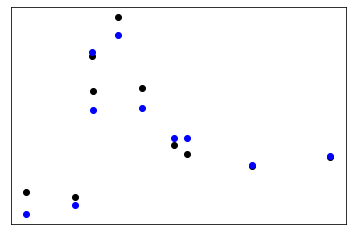

In [19]:
# Plot outputs
plt.scatter(X_test['Administration'], y_test,  color='black')
plt.scatter(X_test['Administration'], y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()

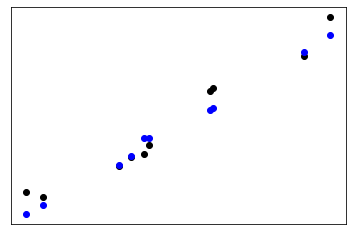

In [20]:
# Plot outputs
plt.scatter(X_test['R&D Spend'], y_test,  color='black')
plt.scatter(X_test['R&D Spend'], y_pred, color='blue')

plt.xticks(())
plt.yticks(())

plt.show()